In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import os
import curvedsky as cs

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

In [4]:
rec = Reconstruction.from_ini('../LB_FG2.ini')


/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1
fg_res included in response


In [5]:
def norm(recOBJ,bcl):
    Ag, Ac = cs.norm_quad.qeb('lens',recOBJ.Lmax,recOBJ.rlmin,recOBJ.rlmax,recOBJ.cl_len[1,:],bcl[1,:],bcl[2,:])
    del Ac
    return Ag

def obs(fg=False,cmb=False):
    """
    Calculate the expected observed spectra using ILC noise
    and effective beam
    """
    ocl = rec.cl_len.copy()
    nt,ne,nb = rec.filt_lib.sim_lib.noise_spectra(500)
    bt,be,bb = rec.filt_lib.sim_lib.beam_spectra(500)
    ft,fe,fb = rec.filt_lib.sim_lib.fg_res_mean(500)
    ctt,cee,cbb = rec.filt_lib.sim_lib.cmb_mean(500)
    
    #(nb[:rec.Lmax+1]/rec.Tcmb**2)/bb[:rec.Lmax+1]**2
    if fg:
        ocl[0,:] += ft[:rec.Lmax+1]*bt[:rec.Lmax+1]**2
        ocl[1,:] += fe[:rec.Lmax+1]*be[:rec.Lmax+1]**2
        ocl[2,:] += fb[:rec.Lmax+1]*bb[:rec.Lmax+1]**2

    ocl[0,:] += nt[:rec.Lmax+1]/bt[:rec.Lmax+1]**2
    ocl[1,:] += ne[:rec.Lmax+1]/be[:rec.Lmax+1]**2
    ocl[2,:] += nb[:rec.Lmax+1]/bb[:rec.Lmax+1]**2

    if cmb:
        ocl = np.zeros_like(ocl)

        ocl[0,:] += ctt[:rec.Lmax+1]
        ocl[1,:] += cee[:rec.Lmax+1]
        ocl[2,:] += cbb[:rec.Lmax+1]
    return ocl

In [6]:
ocl1 = obs()
ocl2 = obs(fg=True)
ocl3 = obs(cmb=True)

In [7]:
cmb,_,_ = rec.filt_lib.sim_lib.get_cmb_alms(0)

(1e-19, 1e-16)

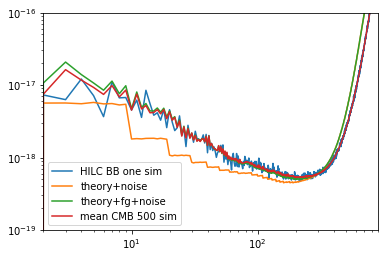

In [8]:
plt.loglog(hp.alm2cl(cmb[2])/rec.Tcmb**2,label='HILC BB one sim')
plt.loglog(ocl1[2,:],label='theory+noise')
plt.loglog(ocl2[2,:],label='theory+fg+noise')
plt.loglog(ocl3[2,:],label='mean CMB 500 sim')
plt.legend()
plt.xlim(2,900)
plt.ylim(1e-19,1e-16)

In [9]:
norm1 = norm(rec,ocl1)
norm2 = norm(rec,ocl2)
norm3 = norm(rec,ocl3)

In [10]:
plt.loglog((rec.MCN0()/rec.response_mean()**2)*rec.Lfac,label='(mcn0)/(response)**2')
plt.loglog(rec.cl_pp*rec.Lfac)
plt.loglog(norm1*rec.Lfac,label='norm without fg')
plt.loglog(norm2*rec.Lfac,label='norm with fg')
plt.loglog(norm3*rec.Lfac,label='norm with cmb')
plt.legend()
plt.xlim(2,800)
plt.ylim(1e-7,4e-7)

corss spectra stat:   1%|          | 4/400 [00:17<29:25,  4.46s/simulation]


KeyboardInterrupt: 

In [36]:
cmb[0]

array([7.91276501e-12, 4.82326455e-12, 1.00479946e-10, ...,
       1.86968129e-12, 1.89828731e-12, 1.93843235e-12])